# Simple Analysis of What's App Family Group

In [1]:
import re
import pandas as pd

# for lines in file:
#     if startsWithDate(lines) and intermediate:
#         finalData.append(' '.join(intermediate))
#         intermediate.clear()
#     intermediate.append(lines)
#
# print(finalData)


In [2]:
def startsWithDate(line):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9][0-9])'
    result = re.match(pattern, line)
    if result:
        return True
    return False

In [3]:
def separationOfData(lines):
    data , time , author , halfMessage , authorAction = None , None , None , None , None
    line = lines.split('-')
    dateTime = line[0]
    date , time = dateTime.split(',')
    # print(date , time)
    authorMessage = line[1]
    if ': ' in authorMessage:
        authorMessage = authorMessage.split(': ')
        author = authorMessage[0]
        halfMessage = ''.join(authorMessage[1:])

    else:
        authorAction = line[1]

    return date , time , author , halfMessage ,authorAction

In [4]:
intermediate =[]
finalData  = []
def joinMultiLines(lines):
    if startsWithDate(lines) and intermediate:
        finalData.append(' '.join(intermediate))
        intermediate.clear()
    intermediate.append(lines)
    return finalData

In [5]:
chatFile = open('Family Conversation.txt', 'r' , encoding="utf8")

for lines in chatFile:
    multiLineList = joinMultiLines(lines)


In [6]:
final = []
for element in multiLineList:
    date , time , author , message , authorAction = separationOfData(element)
    final.append([date,time,author,message,authorAction])
#     print(date)
#     final.append({'Date':date , 'Time':time , 'Author':author, 'Message':message , 'AuthorAction':authorAction})
# print(final)

In [7]:
chatDataframe = pd.DataFrame(final , columns = ['Date','Time','Author','Message','AuthorAction'])
chatDataframe

,Date,Time,Author,Message,AuthorAction
0,7/15/16,19:27,Nandhakumar Muthusamy,Kekka nalla than iruuku da. Padravanga kastam ...,None
1,7/22/16,10:19,Nandhakumar Muthusamy,Ok. Here too 28$ for today\n,None
2,7/22/16,10:19,Nandhakumar Muthusamy,From tomorrow 20$\n,None
3,7/22/16,10:19,Uma Gurusamy,No mams. Athulam summa scene podranga. But com...,None
4,7/22/16,10:20,Uma Gurusamy,U ppl are planning to go ah mama\n,None
...,...,...,...,...,...
7809,7/9/20,11:19,Sri,<Media omitted>\n,None
7810,7/9/20,11:44,Uma Gurusamy,Thanks sri\n,None
7811,7/9/20,12:17,AmshaPriya Nandhakumar,We are learning basic Python from linkedin lea...,None
7812,7/9/20,15:32,Uma Gurusamy,Ok ka\n,None


In [8]:
# chatDataframe.head()
# chatDataframe.tail()
noneCheck = chatDataframe[(chatDataframe['Author']==' Nandhakumar Muthusamy') & (chatDataframe['Author'].notnull())]
# print(noneCheck['Date'].count)
noneCheck
# check = noneCheck['Author'].tolist()
# print(len(check))
# c = chatDataframe[chatDataframe["Author"].isnull()]
# c


,Date,Time,Author,Message,AuthorAction
0,7/15/16,19:27,Nandhakumar Muthusamy,Kekka nalla than iruuku da. Padravanga kastam ...,None
1,7/22/16,10:19,Nandhakumar Muthusamy,Ok. Here too 28$ for today\n,None
2,7/22/16,10:19,Nandhakumar Muthusamy,From tomorrow 20$\n,None
6,7/24/16,22:40,Nandhakumar Muthusamy,👍🏻😀\n,None
8,7/29/16,01:03,Nandhakumar Muthusamy,🙀🙀🙀\n,None
...,...,...,...,...,...
7757,6/23/20,23:08,Nandhakumar Muthusamy,👌🏻👌🏻👌🏻\n,None
7775,6/30/20,21:41,Nandhakumar Muthusamy,🙏🏻🙏🏻🙏🏻\n,None
7792,7/2/20,21:16,Nandhakumar Muthusamy,Super cute... motta boss\n,None
7795,7/3/20,22:01,Nandhakumar Muthusamy,👍🏻👍🏻\n,None


In [9]:
# chatDataframe[50:62]
# chatDataframe.loc[:5]
# chatDataframe.loc[[2]]

In [10]:
# chatDataframe.Author.unique()
# chatDataframe.shape

In [11]:
author_dataset = chatDataframe.Author.unique()
author = author_dataset.tolist()
author_x = list(filter(None,author))
print(author_x)

[' Nandhakumar Muthusamy', ' Uma Gurusamy', ' AmshaPriya Nandhakumar', ' Sri', ' Rama Prabha Gurusamy', ' Ammayi Airtel', ' Prameela Gurusamy', ' Thatha', ' Angulakshmi Dhandapani', ' Ammayi']


In [12]:
# authorCount = chatDataframe[(chatDataframe['Author']==' Nandhakumar Muthusamy') & (chatDataframe['Author'].notnull())]
# authorCount
authorList = []
countList = []

def authorCount(author,cols):
    a = chatDataframe[(chatDataframe[cols]== author) & (chatDataframe[cols].notnull())]
    authCount = a[cols].tolist()
#     authorList.append(author)
    countList.append(len(authCount))
    return countList
    

In [13]:
for i in author_x:
    countList_y = authorCount(i,"Author")

# print(authorList)
print(countList_y)
countList.clear()

[1918, 1832, 1336, 615, 686, 111, 861, 289, 108, 3]


In [14]:
addingTime= chatDataframe["Time"].str.split(":",n= 1, expand = True)
# timeHrs.iloc[:,0]
chatDataframe["Hours"] = addingTime[0]
chatDataframe["Mins"] = addingTime[1]
chatDataframe
# print(type(new))

,Date,Time,Author,Message,AuthorAction,Hours,Mins
0,7/15/16,19:27,Nandhakumar Muthusamy,Kekka nalla than iruuku da. Padravanga kastam ...,None,19,27
1,7/22/16,10:19,Nandhakumar Muthusamy,Ok. Here too 28$ for today\n,None,10,19
2,7/22/16,10:19,Nandhakumar Muthusamy,From tomorrow 20$\n,None,10,19
3,7/22/16,10:19,Uma Gurusamy,No mams. Athulam summa scene podranga. But com...,None,10,19
4,7/22/16,10:20,Uma Gurusamy,U ppl are planning to go ah mama\n,None,10,20
...,...,...,...,...,...,...,...
7809,7/9/20,11:19,Sri,<Media omitted>\n,None,11,19
7810,7/9/20,11:44,Uma Gurusamy,Thanks sri\n,None,11,44
7811,7/9/20,12:17,AmshaPriya Nandhakumar,We are learning basic Python from linkedin lea...,None,12,17
7812,7/9/20,15:32,Uma Gurusamy,Ok ka\n,None,15,32


In [15]:
hours_x = chatDataframe.Hours.unique()
hour_x = hours_x.tolist()
hrs = list(filter(None,hour_x))
hrs.sort()
print(hrs)

[' 00', ' 01', ' 02', ' 03', ' 04', ' 05', ' 06', ' 07', ' 08', ' 09', ' 10', ' 11', ' 12', ' 13', ' 14', ' 15', ' 16', ' 17', ' 18', ' 19', ' 20', ' 21', ' 22', ' 23']


In [16]:
for x in hrs:
    countHrs_y = authorCount(x,"Hours")

print(countHrs_y)
print(len(countHrs_y))

[211, 88, 35, 117, 63, 134, 289, 330, 554, 339, 602, 451, 339, 203, 137, 181, 135, 132, 198, 372, 599, 875, 864, 566]
24


In [17]:
import matplotlib.pyplot as plt

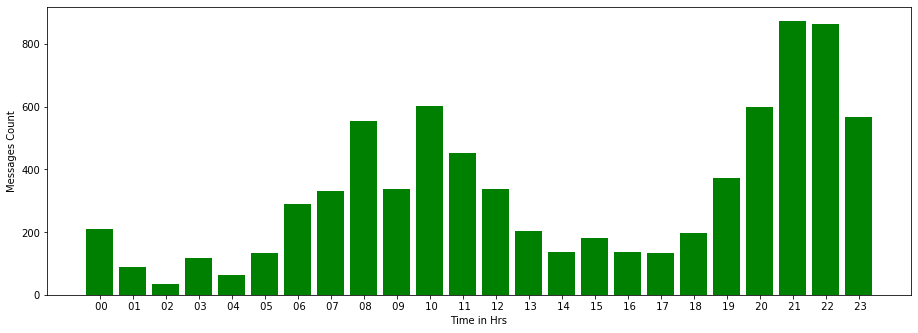

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(hrs,countHrs_y,color = 'g')
ax.set_xlabel("Time in Hrs")
ax.set_ylabel("Messages Count")
plt.show()

In [20]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,2,1])
# ax.axis('equal')
# ax.pie(countList_y, labels = author,autopct='%1.2f%%')
# plt.show()

 Nandhakumar Muthusamy     1918
 Uma Gurusamy              1832
 AmshaPriya Nandhakumar    1336
 Prameela Gurusamy          861
 Rama Prabha Gurusamy       686
 Sri                        615
 Thatha                     289
 Ammayi Airtel              111
 Angulakshmi Dhandapani     108
 Ammayi                       3
Name: Author, dtype: int64


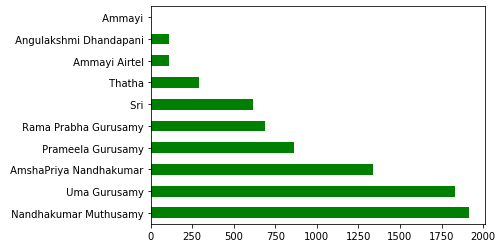

In [21]:
talkative = chatDataframe.Author.value_counts()
print(talkative)
talkative.plot.barh(color = 'green')

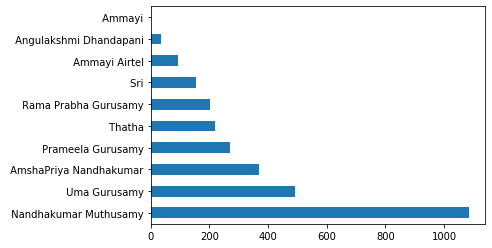

In [22]:
mediaMessage = chatDataframe[chatDataframe['Message']=='<Media omitted>\n']
highMediaSender = mediaMessage.Author.value_counts()
# print(highMediaSender)
highMediaSender.plot.barh()

In [23]:
# talkative = chatDataframe.Author.value_counts()
# mediaSender = chatDataframe[chatDataframe['Message'] == '<Media omitted>\n']
# df = pd.DataFrame({'Message': talkative,
#                    'Media': mediaSender})
# df.plot.barh()

 Uma Gurusamy              1339
 AmshaPriya Nandhakumar     966
 Nandhakumar Muthusamy      832
 Prameela Gurusamy          592
 Rama Prabha Gurusamy       482
 Sri                        460
 Angulakshmi Dhandapani      74
 Thatha                      71
 Ammayi Airtel               17
Name: Author, dtype: int64


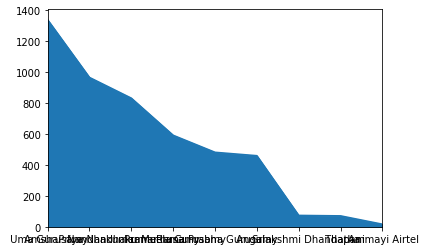

In [24]:
nonMediaMessage = chatDataframe[chatDataframe['Message']!='<Media omitted>\n']
nonMediaTalkative = nonMediaMessage.Author.value_counts()
print(nonMediaTalkative)
nonMediaTalkative.plot.area()

In [26]:
# timeFrame = chatDataframe['Time'].tolist()
# peakTime = [hr[0] for hr in timeFrame: hr.split(':')]
# print(peakTime)
timeFrame = chatDataframe.Time.str.split(':')
# print(timeFrame)
# timewithChat = pd.concat([chatDataframe,timeFrame],axis =1)
# timewithChat.